     pcost       dcost       gap    pres   dres
 0: -2.8120e+00 -4.2731e+00  1e+02  1e+01  1e+00
 1: -1.2892e+00 -3.6729e-01  9e+00  9e-01  1e-01
 2: -4.2823e-02 -1.9080e-01  3e-01  1e-02  2e-03
 3: -7.0315e-02 -1.0160e-01  3e-02  1e-17  1e-15
 4: -9.1342e-02 -9.9171e-02  8e-03  2e-17  9e-16
 5: -9.7055e-02 -9.7200e-02  1e-04  6e-18  1e-15
 6: -9.7168e-02 -9.7169e-02  1e-06  3e-17  1e-15
 7: -9.7169e-02 -9.7169e-02  1e-08  2e-17  1e-15
Optimal solution found.
[0.28846689 0.33335369] [-0.12282475]


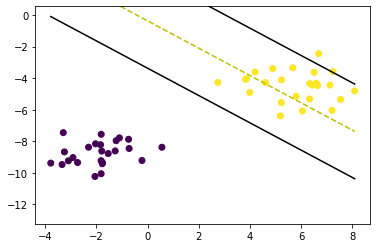

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import cvxopt
import cvxopt.solvers


def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def polynomial_kernel(x, y, p=3):
    return (1 + np.dot(x, y)) ** p

def gaussian_kernel(x, y, sigma=5.0):
    return np.exp(-linalg.norm(x-y)**2 / (2 * (sigma ** 2)))


class SVM:
    def __init__(self, n_iters=1000,kernel=linear_kernel, C=None):
        self.step = 0.01
        self.kernel=linear_kernel
        self.C=None
        self.n_iters = n_iters
        self.w = None
        self.b = None
        if self.C is not None: self.C = float(self.C)
       

        
    def fit(self, X, y):
        #X =>features x samples array
        # y=>labels        
        
        n_samples,n_features = X.shape
        y = y.reshape(-1,1) * 1.
        X_dash = y * X
        H = np.dot(X_dash , X_dash.T) * 1.
        
        
        
        #Converting into cvxopt format
        P = cvxopt.matrix(H)
        q = cvxopt.matrix(-np.ones((n_samples, 1)))
        A = cvxopt.matrix(y.reshape(1, -1))
        b = cvxopt.matrix(np.zeros(1))

                
                
                
        if self.C is None:
            G = cvxopt.matrix(-np.eye(n_samples))
            h = cvxopt.matrix(np.zeros(n_samples))
        else:
            G = cvxopt.matrix(np.vstack((np.eye(n_samples)*-1,np.eye(n_samples))))
            h = cvxopt.matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * C)))
            
            
        sol = cvxopt.solvers.qp(P, q, G, h, A, b)
        a = np.ravel(sol['x'])

        
        sv = a > 1e-5
        ind = np.arange(len(a))[sv]
        self.a = a[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]
        
        

        sv = a > 1e-5
        ind = np.arange(len(a))[sv]
        self.a = a[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]

        # Intercept
        self.b = 0
        for n in range(len(self.a)):
            self.b += self.sv_y[n]
            self.b -= np.sum(self.a * self.sv_y * H[ind[n],sv])
        self.b /= len(self.a)

        # Weight vector
        if self.kernel == linear_kernel:
            self.w = np.zeros(n_features)
            for n in range(len(self.a)):
                self.w += self.a[n] * self.sv_y[n] * self.sv[n]
        else:
            self.w = None
        
        
       

       
    def predict(self, X):
        if self.w is not None:
            return np.dot(X, self.w) + self.b
        else:
            y_predict = np.zeros(len(X))
            for i in range(len(X)):
                s = 0
                for a, sv_y, sv in zip(self.a, self.sv_y, self.sv):
                    s += a * sv_y * self.kernel(X[i], sv)
                y_predict[i] = s
            return np.sign(y_predict + self.b)
    
    def visualize_svm(self):
        
        def get_hyperplane_value(x, w, b, offset):
            return (-w[0] * x + b + offset) / w[1]

        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)
        plt.scatter(X[:,0], X[:,1], marker='o',c=y)

        x0_1 = np.amin(X[:,0])
        x0_2 = np.amax(X[:,0])
        
        # (w.x+b) = 0
        # boundary
        x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
        x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)
        
        # (w.x+b) = -1
        # negative support vector hyperplane
        x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
        x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)
        
        # (w.x+b) = 1
        # positive support vector hyperplane
        x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
        x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

        ax.plot([x0_1, x0_2],[x1_1, x1_2], 'y--')
        ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
        ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'k')

        x1_min = np.amin(X[:,1])
        x1_max = np.amax(X[:,1])
        ax.set_ylim([x1_min-3,x1_max+3])

        plt.show()
        
    
X, y =  datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40)
y = np.where(y == 0, -1, 1)

clf = SVM()
clf.fit(X, y)
#predictions = clf.predict(X)
 
print(clf.w, clf.b)
clf.visualize_svm()